# Prediction Using Decision Tree Algorithm

## Problem Statement

Classifying Iris data using Decision Tree Classifier




#### The analysis is divided into four main parts:

- Data understanding
- Visualising Data 
- Model Building
- Inference

## Step 1 : Data Reading and understanding

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

Here we can observe there are 150 rows and 6 columns

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Here there are no null values present in dataset

In [7]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

There are three types species available -
- Iris-setosa
- Iris-versicolor
- Iris-virginica

#### Checking for Duplicated values

In [8]:
iris.duplicated().sum()

0

There are no duplicated values present

## Step 2:  Data Visualization

In [11]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

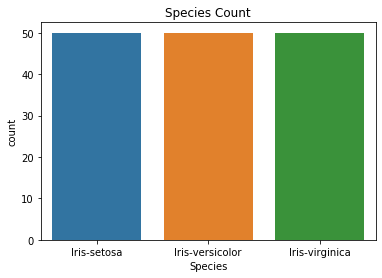

In [9]:
plt.title("Species Count")
sns.countplot(iris['Species'])

This tells that our dataset is balanced with equal records of Species

### Visualising relations between variables

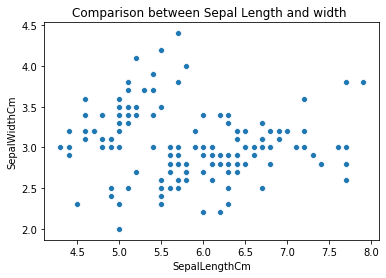

In [12]:
plt.title("Comparison between Sepal Length and width ")
sns.scatterplot(iris['SepalLengthCm'],iris['SepalWidthCm'])

Lets compare on basis of Species 

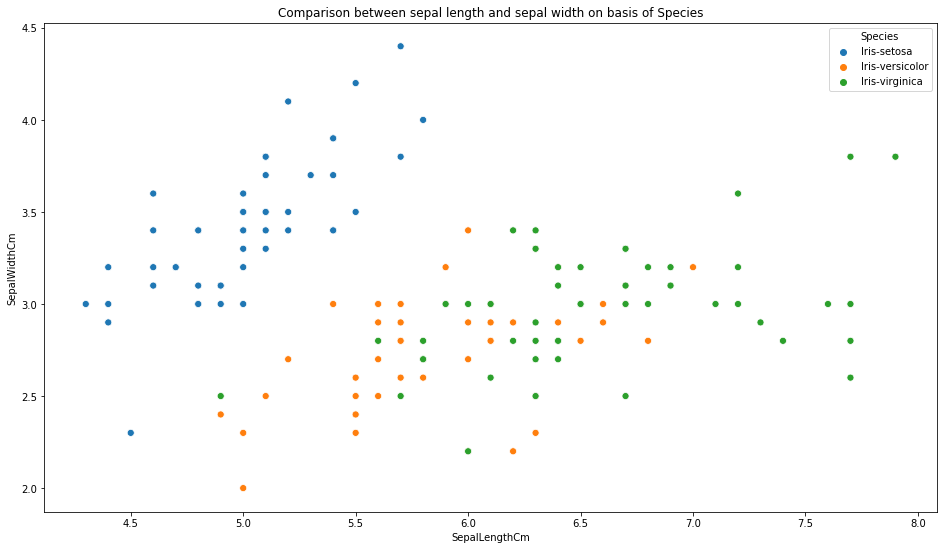

In [13]:
plt.figure(figsize=(16,9))
plt.title("Comparison between sepal length and sepal width on basis of Species")
sns.scatterplot(iris['SepalLengthCm'],iris['SepalWidthCm'], hue=iris['Species'],s=50)

From the above visualization, we can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lengths and smaller sepal widths.

Let's compare petal width and petal length

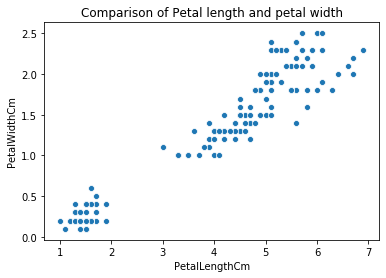

In [14]:
plt.title('Comparison of Petal length and petal width')
sns.scatterplot(iris['PetalLengthCm'],iris['PetalWidthCm'])

Compare petal length and petal width on basis of Species`

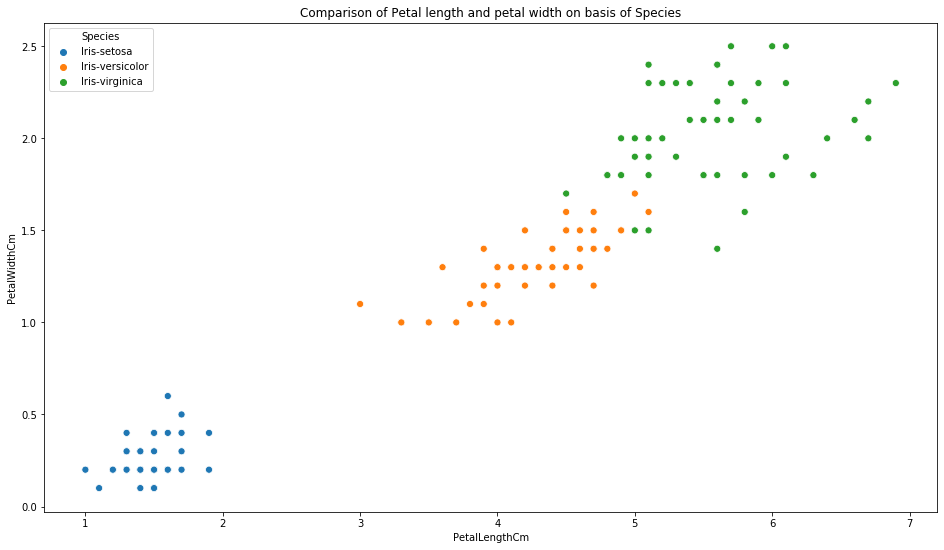

In [15]:
plt.figure(figsize=(16,9))
plt.title('Comparison of Petal length and petal width on basis of Species')
sns.scatterplot(iris['PetalLengthCm'],iris['PetalWidthCm'],hue=iris['Species'],s=50)

We see that setosa has the smallest petal length as well as petal widths, while Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width.

Let's visualize all the columns relationship usin pair plots

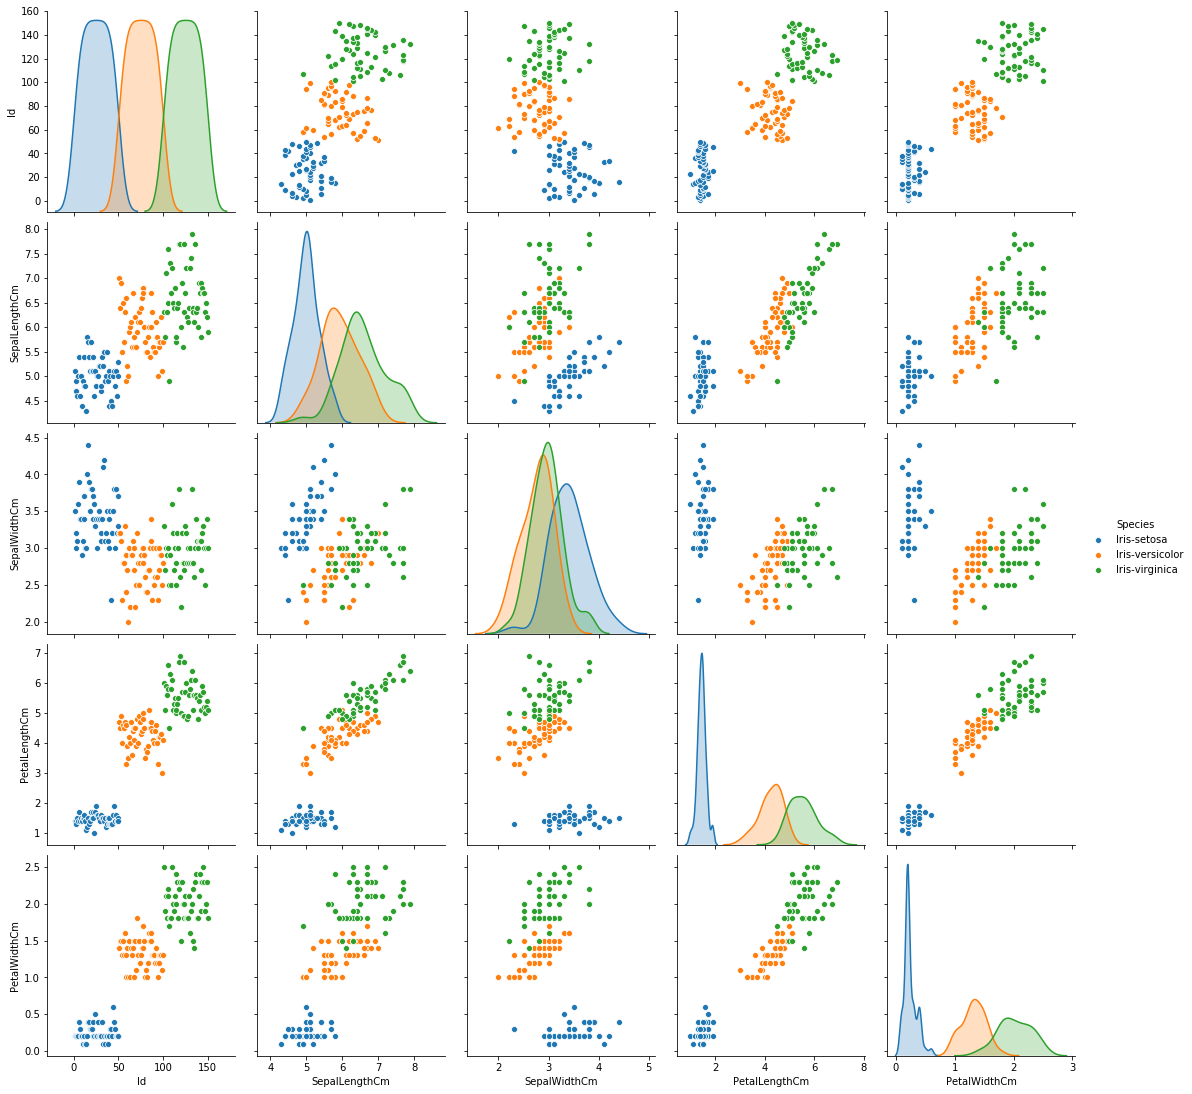

In [17]:
sns.pairplot(iris,hue="Species",height=3)


## Step 3: Model Building

In [18]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [20]:
from sklearn.model_selection import train_test_split

train_X,test_X, train_y,test_y = train_test_split(iris[cols],iris['Species'],test_size=0.2, random_state=123)

In [21]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [22]:
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=1, n_jobs=-1)
tree.fit(train_X,train_y)

I:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   25.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
              

In [25]:
tree.best_score_

0.95

In [26]:
tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
tree.best_params_

{'max_depth': 4, 'max_features': 3}

In [30]:
train_pred= tree.predict(train_X)

In [31]:
test_pred = tree.predict(test_X)

In [32]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## Building Final Decision Tree

In [33]:
clf_tree = DecisionTreeClassifier(max_depth=4, max_features=2)
clf_tree.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
tree_test_pred = pd.DataFrame({'actual': test_y, 'predicted': clf_tree.predict(test_X)})

In [35]:
tree_test_pred.sample(n=10)

,actual,predicted
116,Iris-virginica,Iris-virginica
13,Iris-setosa,Iris-setosa
141,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa
42,Iris-setosa,Iris-setosa
33,Iris-setosa,Iris-setosa
117,Iris-virginica,Iris-virginica
112,Iris-virginica,Iris-virginica
87,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa


In [36]:
metrics.accuracy_score(tree_test_pred.actual, tree_test_pred.predicted )


0.9

Text(0.5, 15.0, 'Predicted Label')

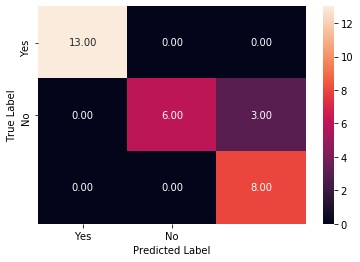

In [46]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,tree_test_pred.actual)

sns.heatmap(tree_cm, annot=True, fmt = '.2f', xticklabels = ["Yes", "No"], yticklabels =["Yes","No"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

### Graphical Representation of Decision Tree

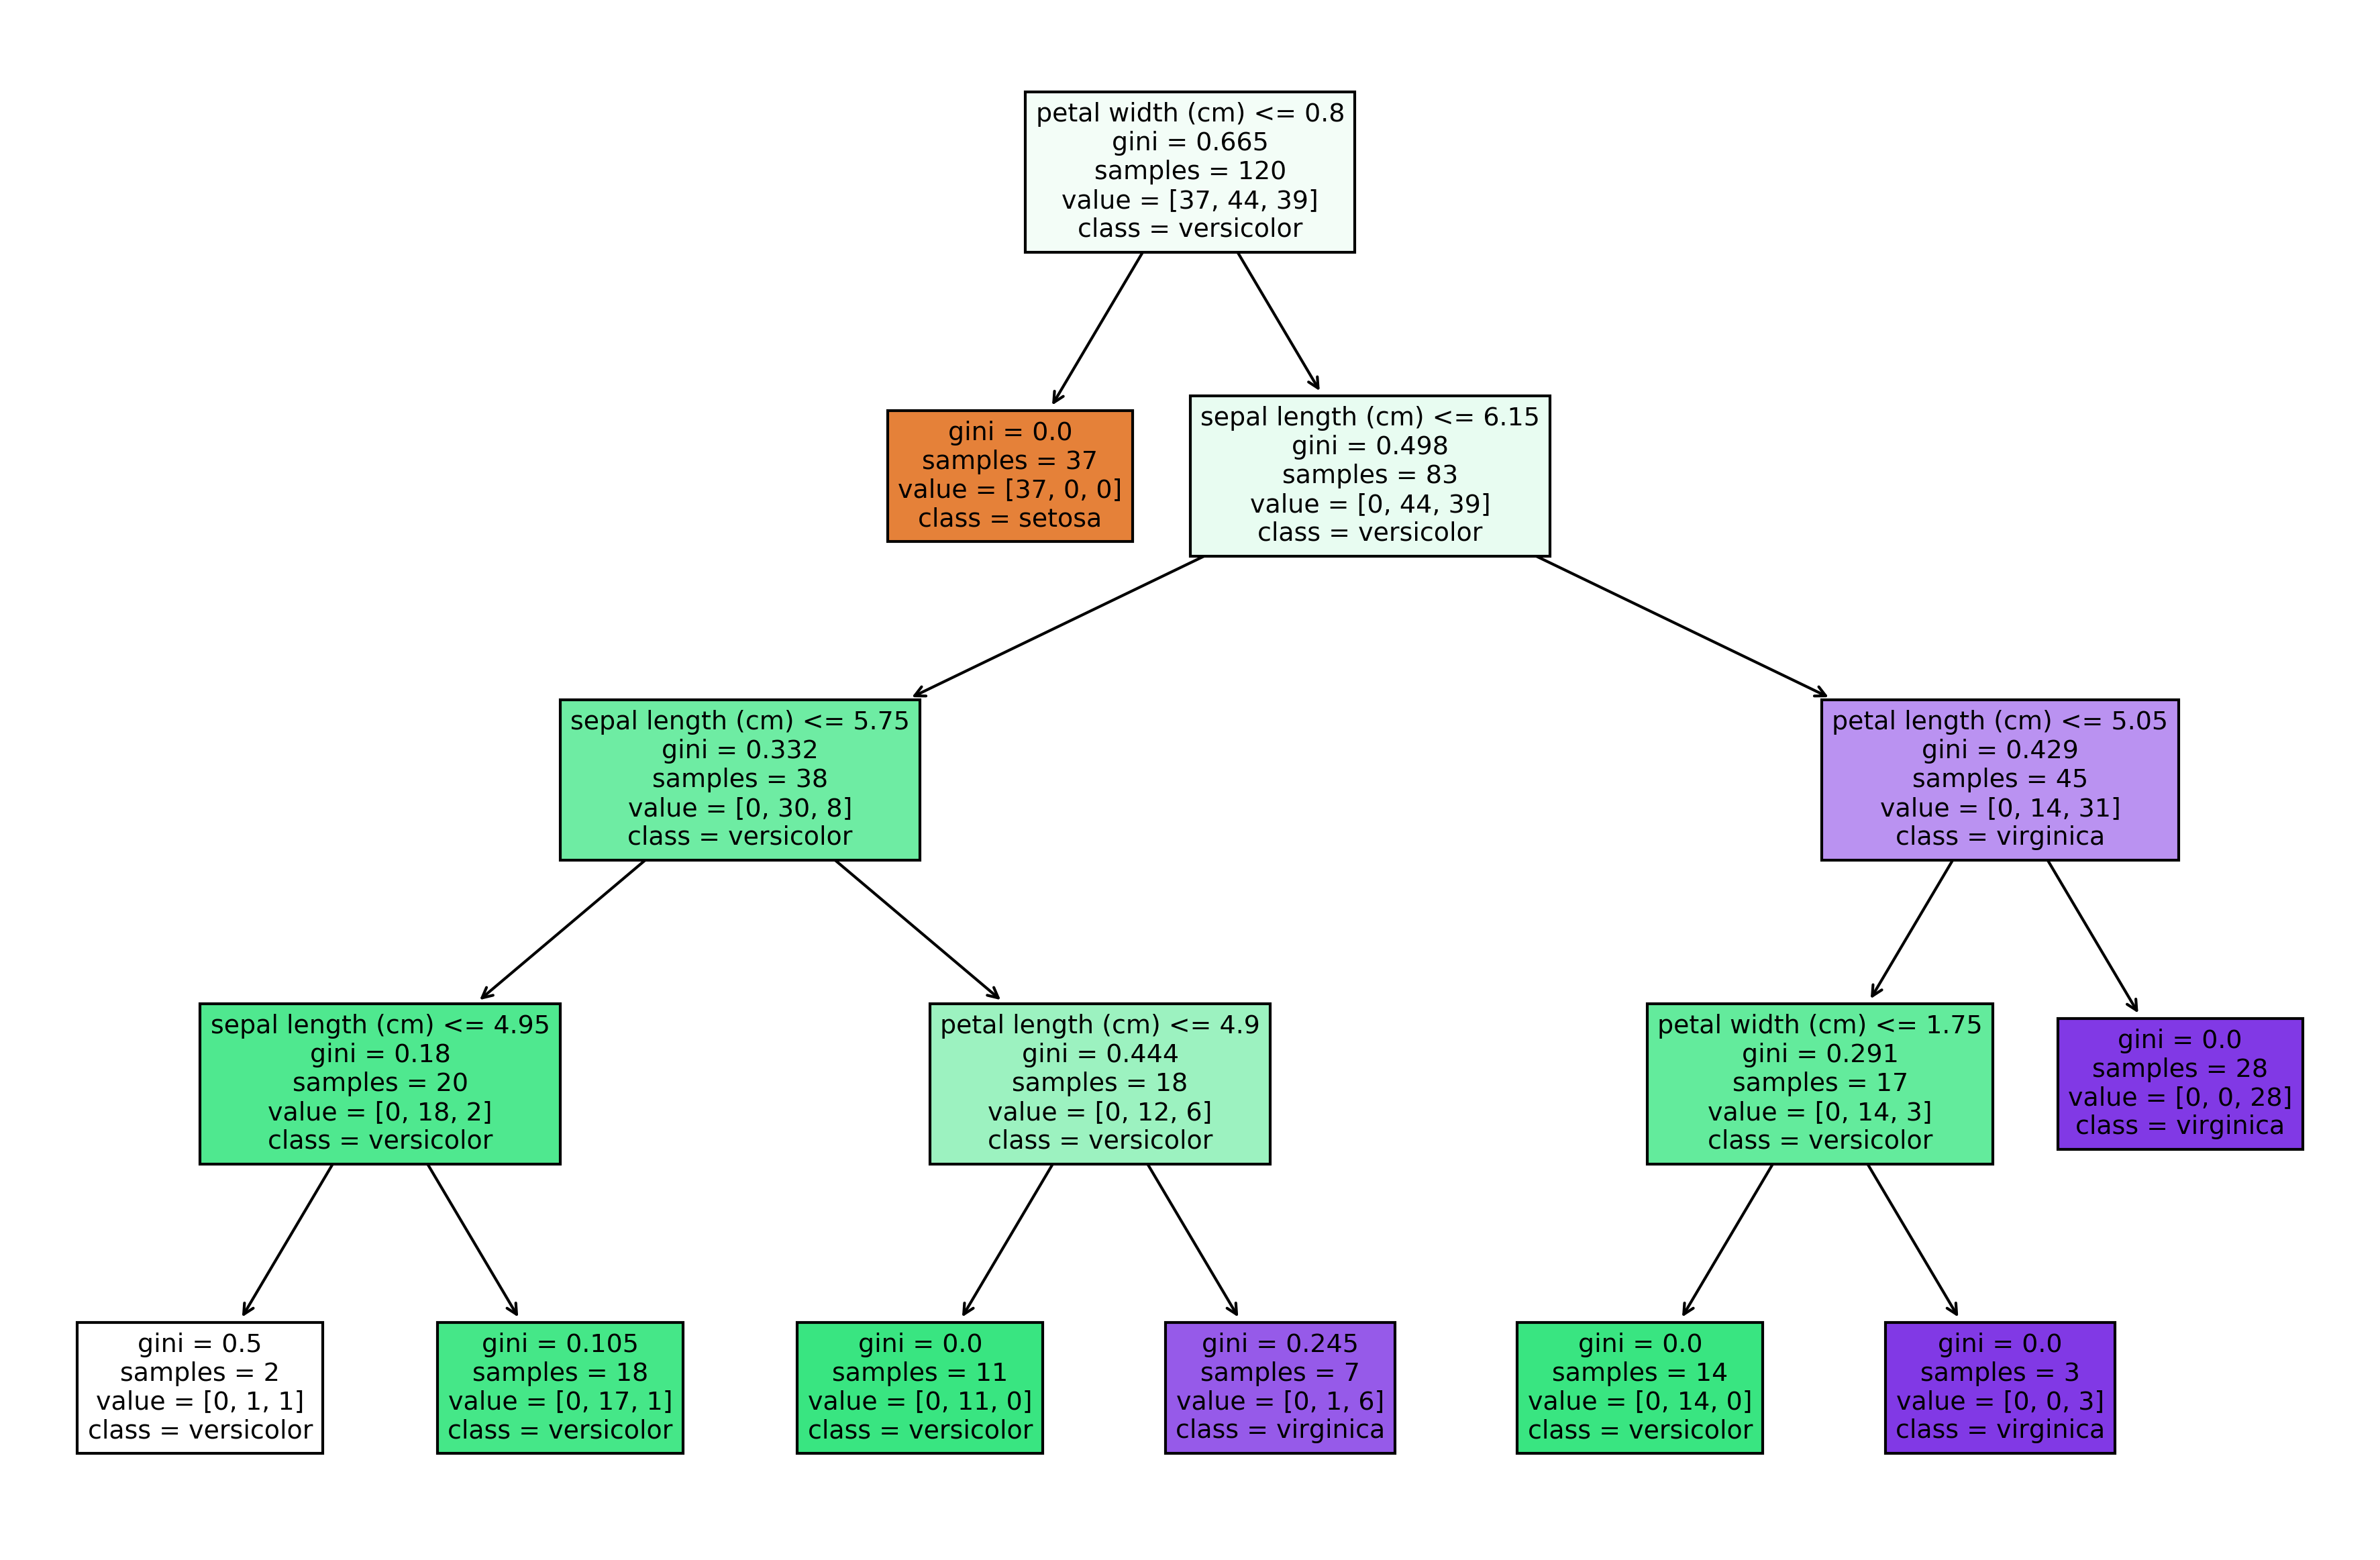

In [47]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')


## Step 4: Inference

- If petal width <= 0.8 cm then samples are 37 and class is Setosa
- Else if Sepal Length <= 6.15 cm and it goes on till root node.
- All the samples are classified to get the result.